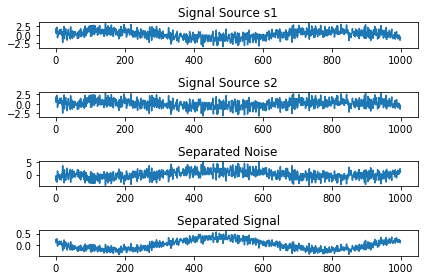

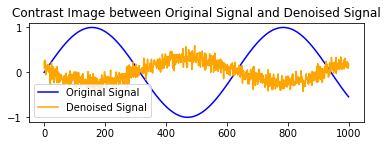

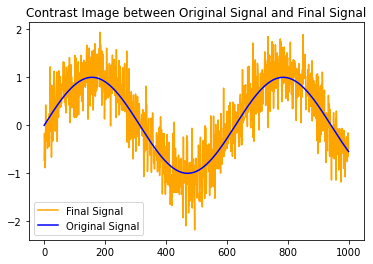

NRMSE between original signal and final signal: 0.19993103502960163


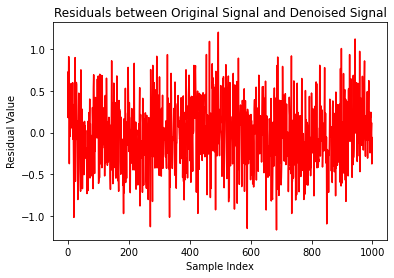

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 生成混合信号
np.random.seed(0)
time = np.linspace(0, 5, 1000)
signal = np.sin(2 * time)  # 信号源
noise = np.random.normal(size=signal.shape)  # 噪声
s1 = signal + noise
s2 = 0.5 * signal + noise

# 执行独立成分分析
pca = PCA(n_components=2)
S = np.c_[s1, s2]
S = pca.fit_transform(S)

# 绘制混合信号和分离信号
plt.figure(1)

plt.subplot(4, 1, 1)
plt.title('Signal Source s1')
plt.plot(s1)

plt.subplot(4, 1, 2)
plt.title('Signal Source s2')
plt.plot(s2)

plt.subplot(4, 1, 3)
plt.title('Separated Noise')
plt.plot(S[:, 0])

plt.subplot(4, 1, 4)
plt.title('Separated Signal')
plt.plot(S[:, 1])

plt.tight_layout()

#绘制原始信号和处理后信号的对比
plt.figure(2)

plt.subplot(2,1,1)
plt.title('Contrast Image between Original Signal and Denoised Signal')
plt.plot(signal, label = 'Original Signal', color = 'blue')
plt.plot(S[:, 1], label = 'Denoised Signal', color = 'orange')
plt.legend()

#发现降噪后的信号幅度有问题，可对降噪后的信号进行处理
plt.figure(3)

S_final = -4*S[:, 1]+0.2
plt.plot(S_final, color = 'orange', label="Final Signal")
plt.plot(signal, color = 'blue', label="Original Signal")
plt.title('Contrast Image between Original Signal and Final Signal')
plt.legend()

plt.show()

# 标准化均方根误差(NRMSE)函数
def calculate_nrmse(original_signal, denoised_signal):
    rmse = np.sqrt(np.mean((original_signal - denoised_signal)**2))
    signal_range = np.max(original_signal) - np.min(original_signal)
    nrmse = rmse / signal_range
    return nrmse

# 计算原始信号和最终信号的 NRMSE
nrmse_value_final = calculate_nrmse(signal, S_final)
print(f"NRMSE between original signal and final signal: {nrmse_value_final}")

# 计算最终信号和原始信号之间的残差
residuals = signal - S_final

# 绘制残差图
plt.figure(4)
plt.plot(residuals, color='red')
plt.title('Residuals between Original Signal and Denoised Signal')
plt.xlabel('Sample Index')
plt.ylabel('Residual Value')
plt.show()